In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import KernelPCA, FastICA, NMF

from sklearn.preprocessing import StandardScaler

In [21]:
df = pd.read_csv('C:/All Programming/Udamy Ml course/Machine Learning/dataset/mall.csv')

x = df.iloc[:, [3,4]].values
age = df.iloc[:, 2].values

y = pd.cut(age, bins=[0, 25, 45, 100], labels=[0, 1, 2]).astype(int)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#### LDA (Linear Discriminant Analysis)

In [22]:
# LDA (requires labels - supervised!)
lda = LinearDiscriminantAnalysis(n_components=2)
x_lda = lda.fit_transform(x_scaled, y)

print(f"Explained variance ratio: {lda.explained_variance_ratio_}")

Explained variance ratio: [0.7328737 0.2671263]


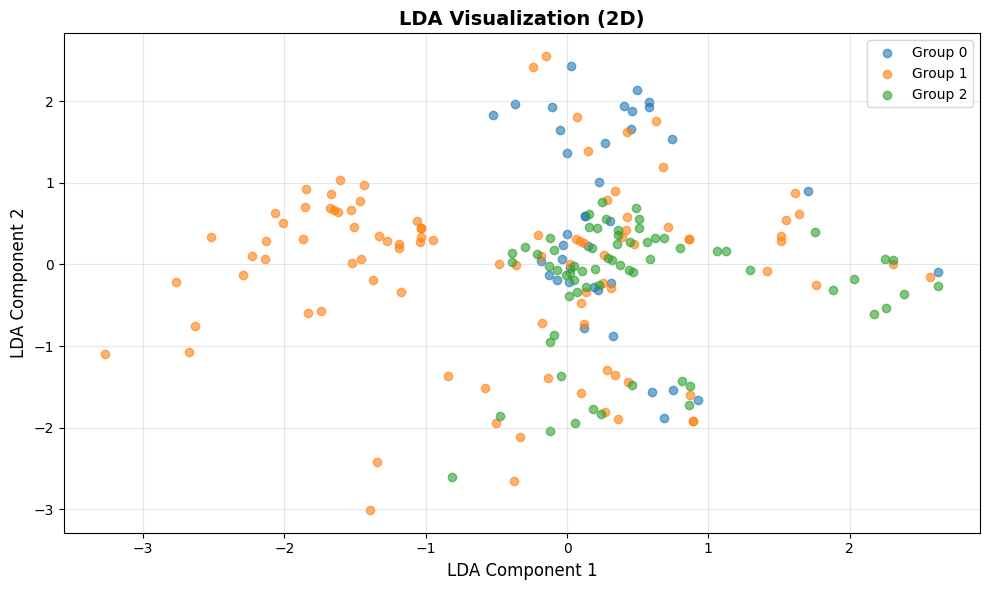

In [23]:
plt.figure(figsize=(10, 6))
for label in np.unique(y):
    mask = (y == label)
    plt.scatter(x_lda[mask, 0], x_lda[mask, 1], alpha=0.6, label=f'Group {label}')
plt.xlabel('LDA Component 1', fontsize=12)
plt.ylabel('LDA Component 2', fontsize=12)
plt.title('LDA Visualization (2D)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### Kernel PCA (Non-linear PCA using kernel trick)

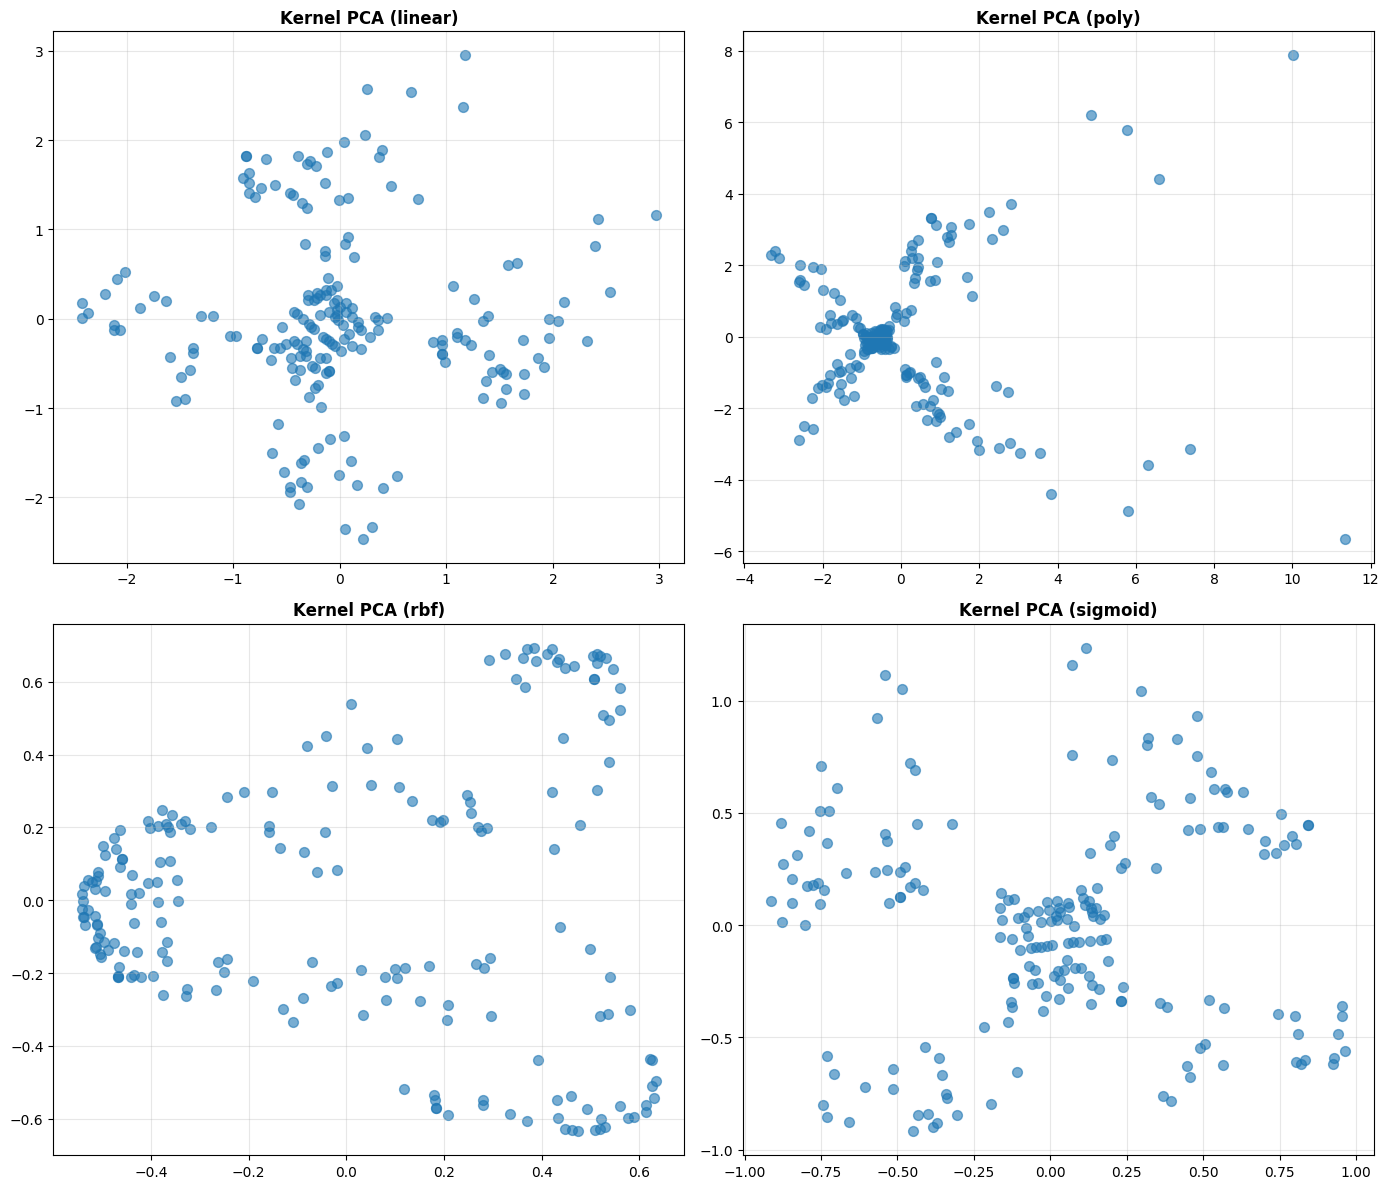

In [24]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, kernel in enumerate(kernels):
    kpca = KernelPCA(n_components=2, kernel=kernel, random_state=42)
    X_kpca = kpca.fit_transform(x_scaled)
    
    axes[idx].scatter(X_kpca[:, 0], X_kpca[:, 1], alpha=0.6, s=50)
    axes[idx].set_title(f'Kernel PCA ({kernel})', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### Independent Component Analysis (ICA)

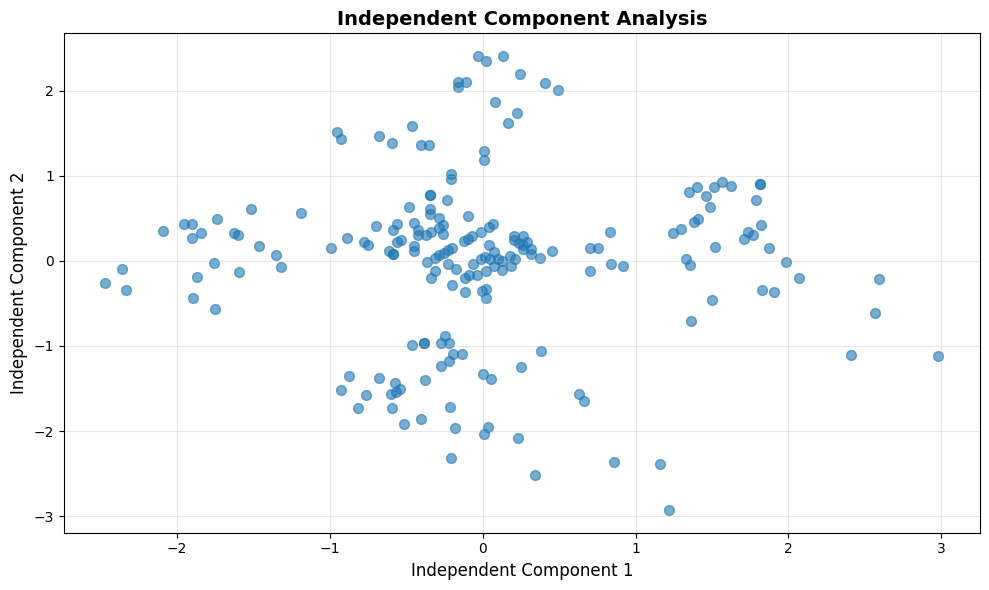

In [25]:
ica = FastICA(n_components=2, random_state=42, max_iter=1000)
x_ica = ica.fit_transform(x_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(x_ica[:, 0], x_ica[:, 1], alpha=0.6, s=50)
plt.xlabel('Independent Component 1', fontsize=12)
plt.ylabel('Independent Component 2', fontsize=12)
plt.title('Independent Component Analysis', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### Non-negative Matrix Factorization (NMF)

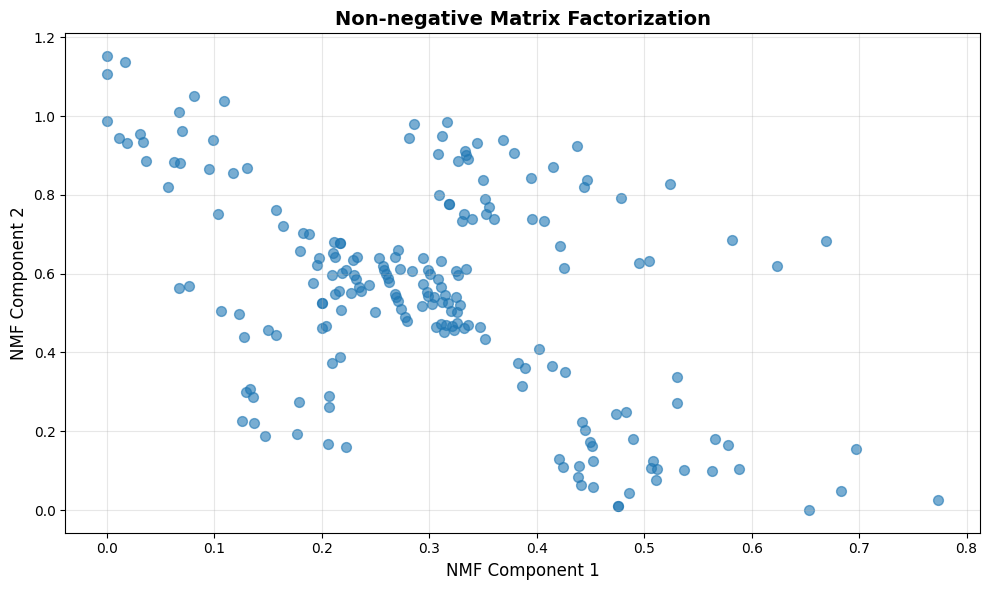

In [26]:
from sklearn.decomposition import NMF

# NMF (requires non-negative data)
X_non_neg = x_scaled - x_scaled.min() + 1

nmf = NMF(n_components=2, random_state=42, max_iter=1000)
X_nmf = nmf.fit_transform(X_non_neg)

plt.figure(figsize=(10, 6))
plt.scatter(X_nmf[:, 0], X_nmf[:, 1], alpha=0.6, s=50)
plt.xlabel('NMF Component 1', fontsize=12)
plt.ylabel('NMF Component 2', fontsize=12)
plt.title('Non-negative Matrix Factorization', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()